

# Investigate Tmdb Data Set



<a id='intro'></a>
## Introduction

>The Movie Database (TMDB) is a database contains infomation about 10,000 movies, including user ratings and revenue. In this report I will clean the data set obtained from TMDB and find how the revenue is influenced by variables like quality of the movie and budget of the movie.


In [1]:
#import packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Load data and check first 5 rows
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Check the shape of the data set
df.shape

(10866, 21)

In [4]:
#Check whether each column has null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning
Firstly I will delete duplicated columns. imdb_id has same function with id. Budget and revenue has another version with same function. Cast, homepage, tagline, keywords, overview and product_company are not directly related with popularity and some of these columns have too many nulls. These columns are deleted.

In [5]:
#Drop columns with repeat info or with info not related with this analysis
df.drop(['imdb_id','budget','revenue','cast','homepage','tagline','keywords','overview','production_companies'],axis=1,inplace=True)

In [6]:
#Check whether unneeded columns are deleted
df.head()

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Secondly I will check whether the new data set contains nulls and 0. These 0s andnulls will be deleted.

In [7]:
#Check whether data set has 0 and change 0 to nulls
df.replace(0, np.nan,inplace=True)

In [8]:
#Check whether data set has nulls
df.isnull().sum()

id                   0
popularity           0
original_title       0
director            44
runtime             31
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64

In [9]:
#Drop rows contains nulls
df.dropna(inplace=True)

In [10]:
#Check whether the data set contains nulls
df.isnull().sum()

id                0
popularity        0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

Lastly I will check whether there are duplicated data. These duplicated data will be deleted.

In [11]:
#Check whether there is duplicated data
sum(df.duplicated())

1

In [12]:
#Delete duplicated data
df.drop_duplicates(inplace=True)

In [13]:
#Check whether there is duplicated data again
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

> Now I've trimmed and cleaned my data, I am going to move on to exploration. I will use visualization to figure out whether popularity is correlated with movie rate(in this case is the vote_average column). Then I will figure out whether the revenue a movie generates is influenced by the quality of the movie or the budget of the movie.

### What is the most common run time for a movie?

In [14]:
#Check the shape of the data set
df.shape

(3853, 12)

In [15]:
#Check basic info of this data set
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3.853000e+03,3.853000e+03
mean,39894.523488,1.191825,109.208928,527.854399,6.168258,2001.259278,4.425038e+07,1.370974e+08
std,67230.100737,1.475258,19.912913,880.031643,0.795001,11.283517,4.481043e+07,2.161299e+08
min,5.000000,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.000000,0.462609,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.840420e+07
50%,11321.000000,0.797723,106.000000,204.000000,6.200000,2004.000000,3.001664e+07,6.174274e+07
75%,38575.000000,1.368403,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632752e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


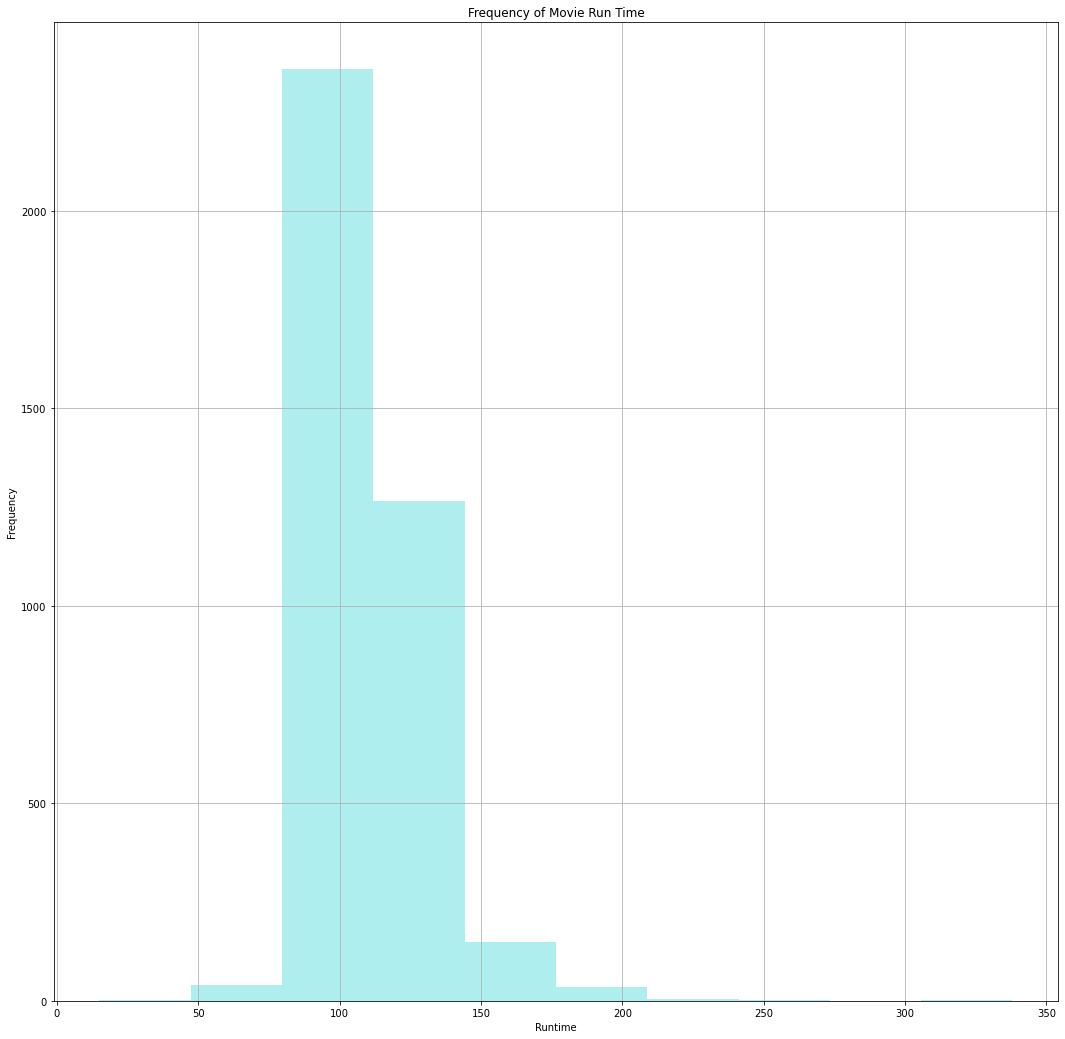

In [16]:
#Make a histogram to show which run time is the commonest in a movie 
plt.figure(figsize=(18,18))
plt.hist(df['runtime'],color='paleturquoise')
plt.grid()
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Frequency of Movie Run Time');

According to the histogram we can see movies around 100 minutes are the most common time area. It is quite reasonable since movies longer than 120 minutes make people tired while movies shorter than 90 minutes donot have enough time to tell a full story. 

### Do the quality of movies decrease over year?

In [17]:
#Calculate average rate of movies each year
year_rate_avg=df.groupby(['release_year']).vote_average.mean()

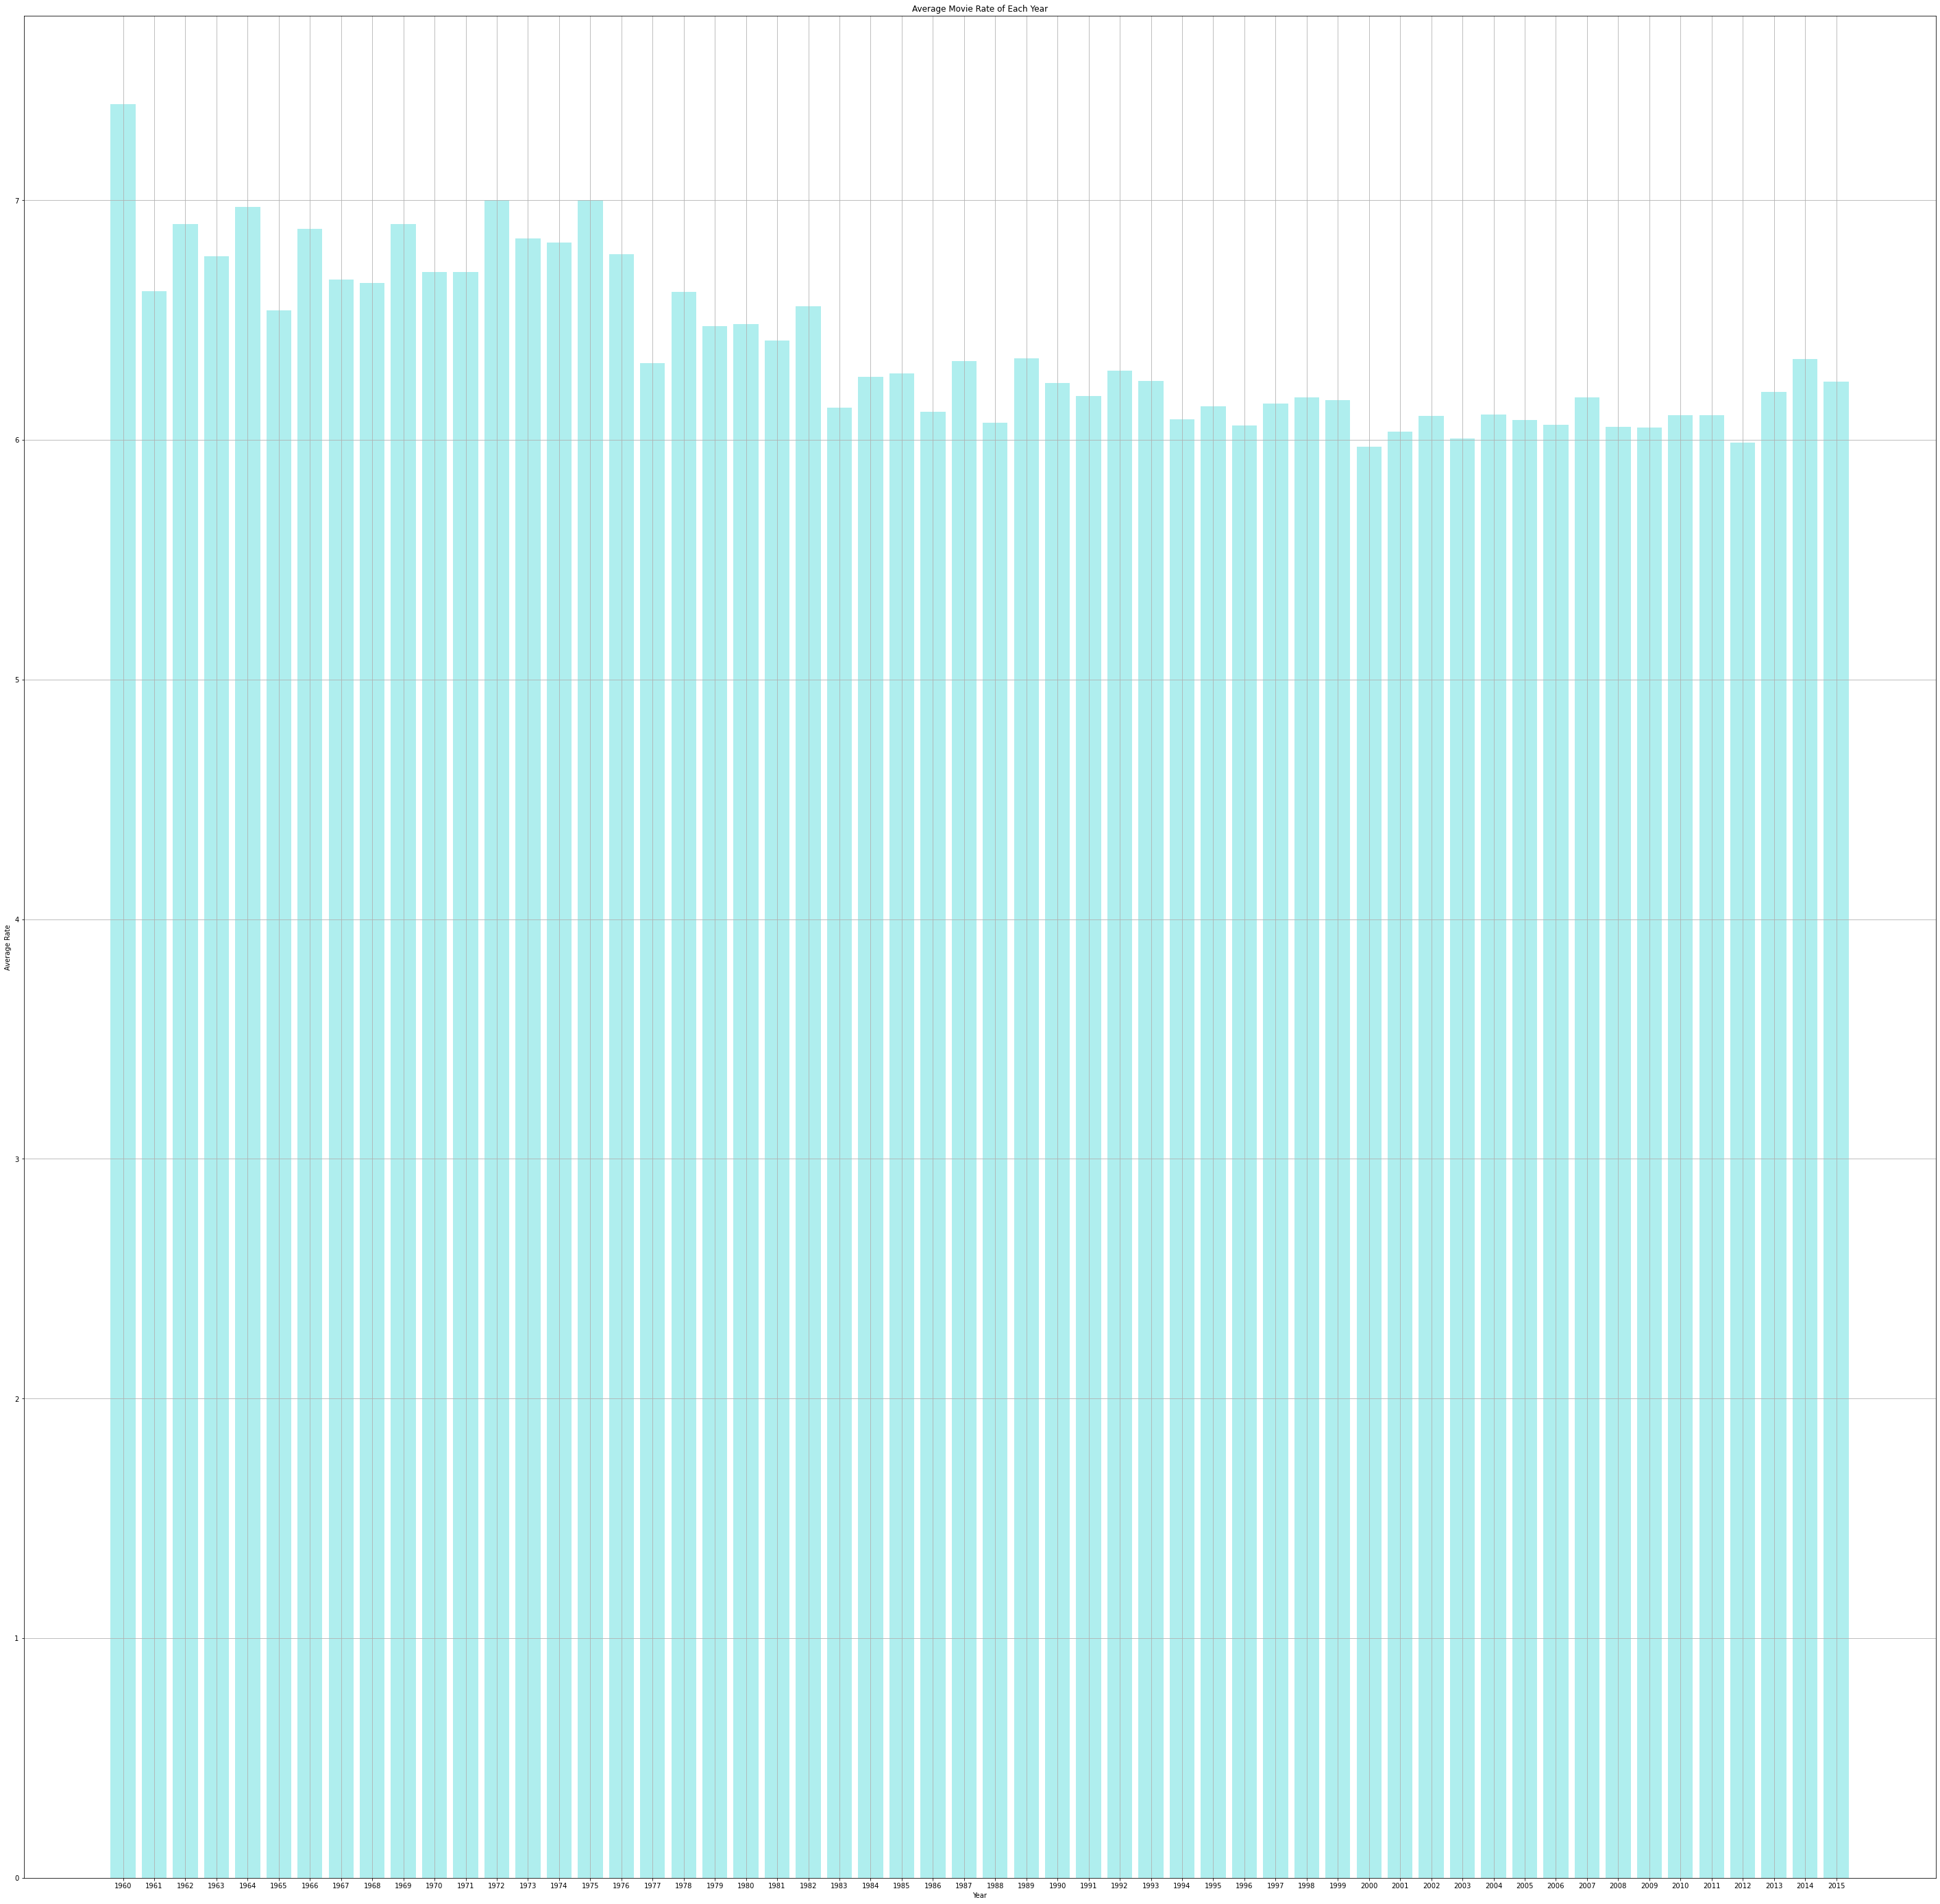

In [18]:
#Make the chart to show the avergae rate of movie each year
plt.figure(figsize=(50,50))
x_label=np.arange(len(year_rate_avg))
plt.bar(x_label, year_rate_avg,color='paleturquoise')
plt.xticks(x_label,year_rate_avg.index)
plt.xlabel('Year')
plt.ylabel('Average Rate')
plt.title('Average Movie Rate of Each Year')
plt.grid();

According to this chart, movies from 1960 has the highest average rating, which is above 7. Then the ratings slowly decrease from 7 to around 6.5(Around 1982). After 1982 the average rating of movies keep decreasing to around 6. Based on this chart it is proper to say the quality of movies has been slowly decreasing overtime.

### Whether popularity of a movie is correlated with the rate of it?

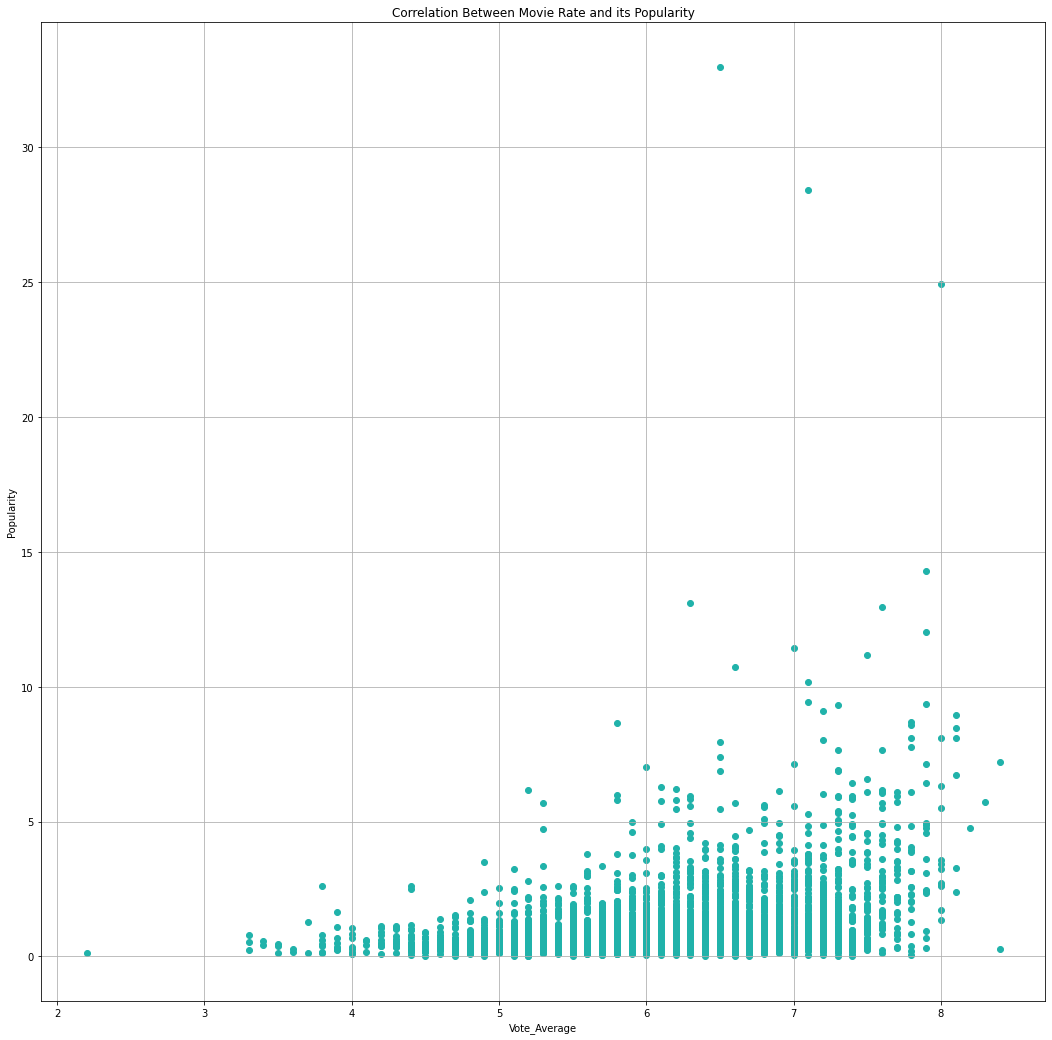

In [19]:
#Make the chart to show the relation between movie rate and popularity
plt.figure(figsize=(18,18))
plt.scatter(df['vote_average'],df['popularity'],color='lightseagreen')
plt.xlabel('Vote_Average')
plt.ylabel('Popularity')
plt.title('Correlation Between Movie Rate and its Popularity')
plt.grid();

Except outliers which have popularity higher than 15, movies with a higher vote_average value are more popular.

### Whether the revenue generated by a movie is influened by its quality(in this case is the vote_average of the movie) and its budget?

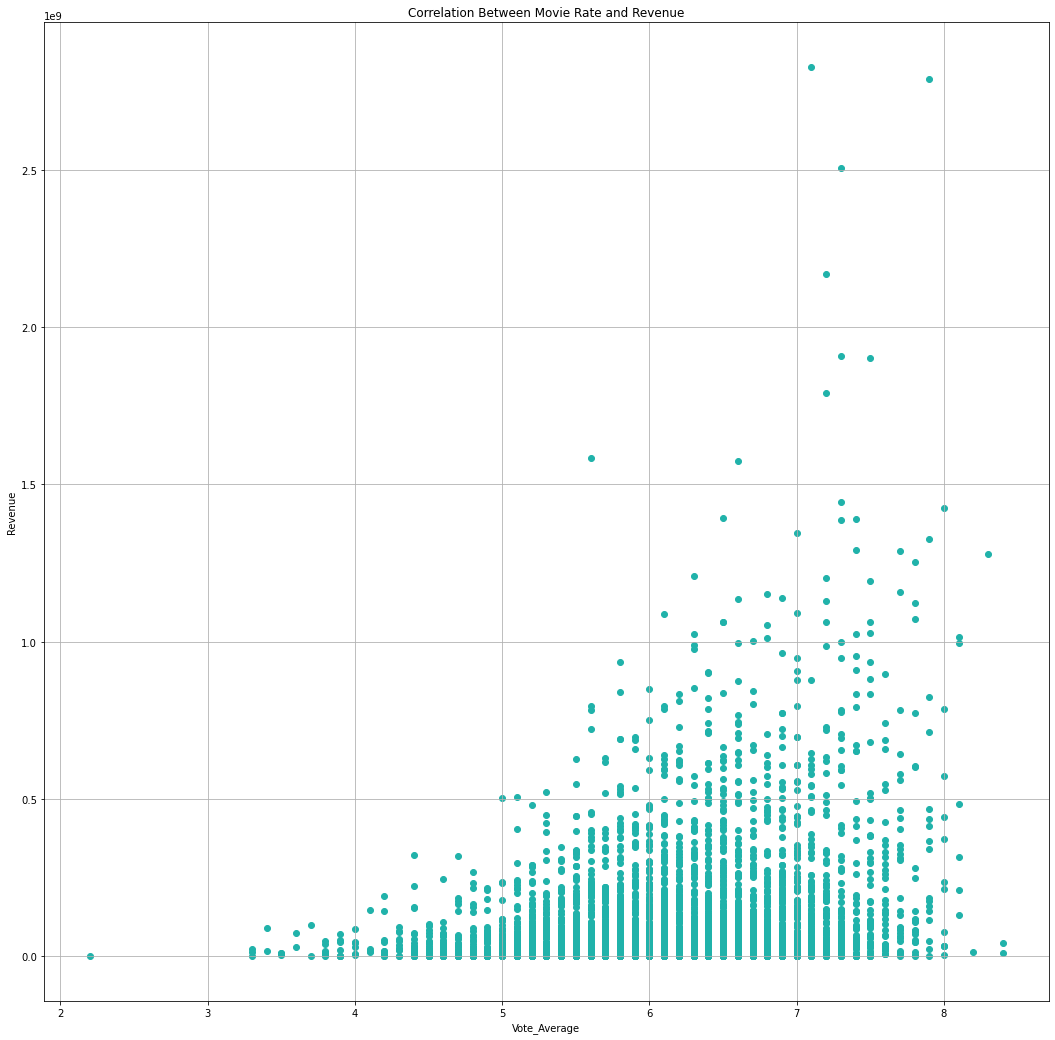

In [20]:
#Make the chart to show the relation between rate of the movie and revenue that movie generates
plt.figure(figsize=(18,18))
plt.scatter(df['vote_average'],df['revenue_adj'],color='lightseagreen')
plt.xlabel('Vote_Average')
plt.ylabel('Revenue')
plt.title('Correlation Between Movie Rate and Revenue')
plt.grid();

According to this chart it is proper to say movies with a higher rating normally generate higher revenue.

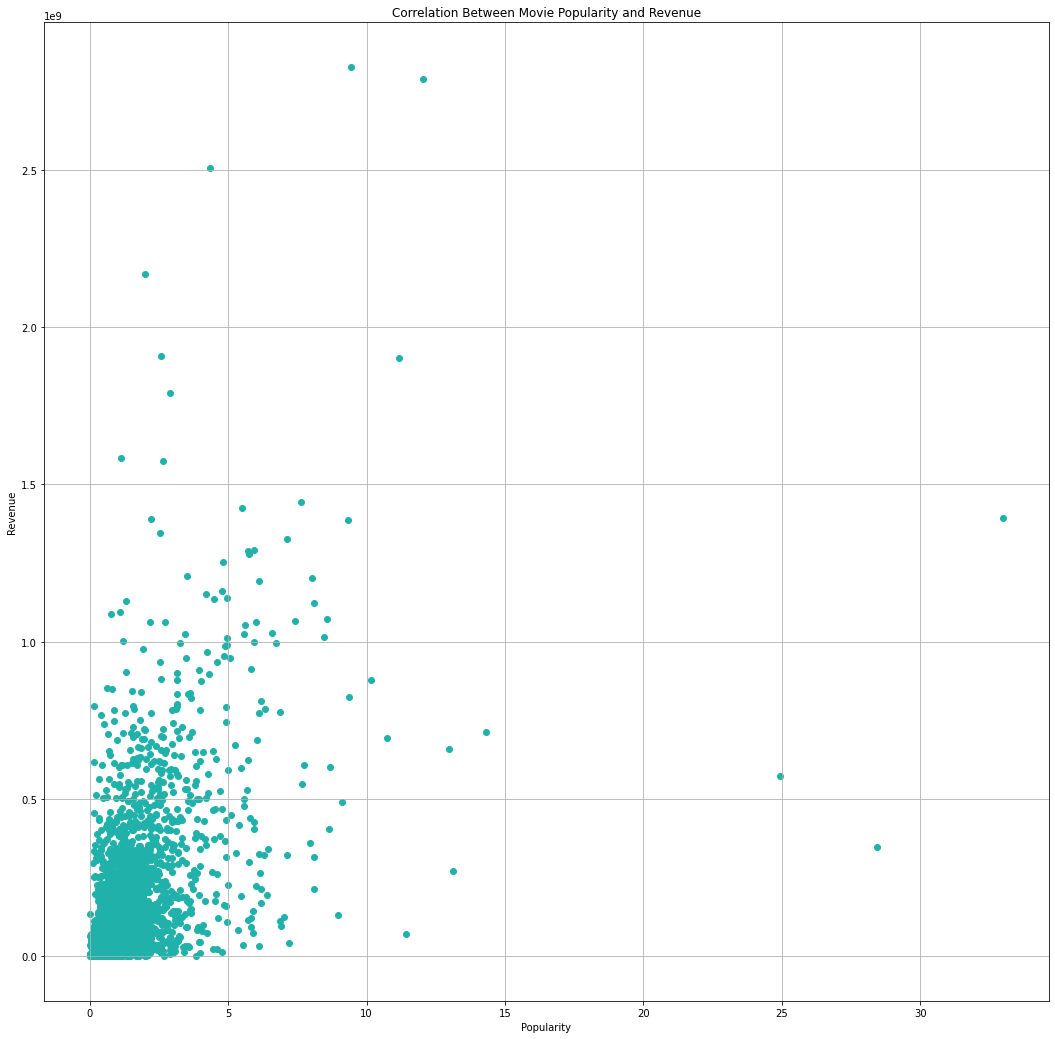

In [21]:
#Make the chart to show the relation between movie popularity and revenue generated by the movie
plt.figure(figsize=(18,18))
plt.scatter(df['popularity'],df['revenue_adj'],color='lightseagreen')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Correlation Between Movie Popularity and Revenue')
plt.grid();

Popularity of a movie seems to have no clear correlation with the revenue generated by it.

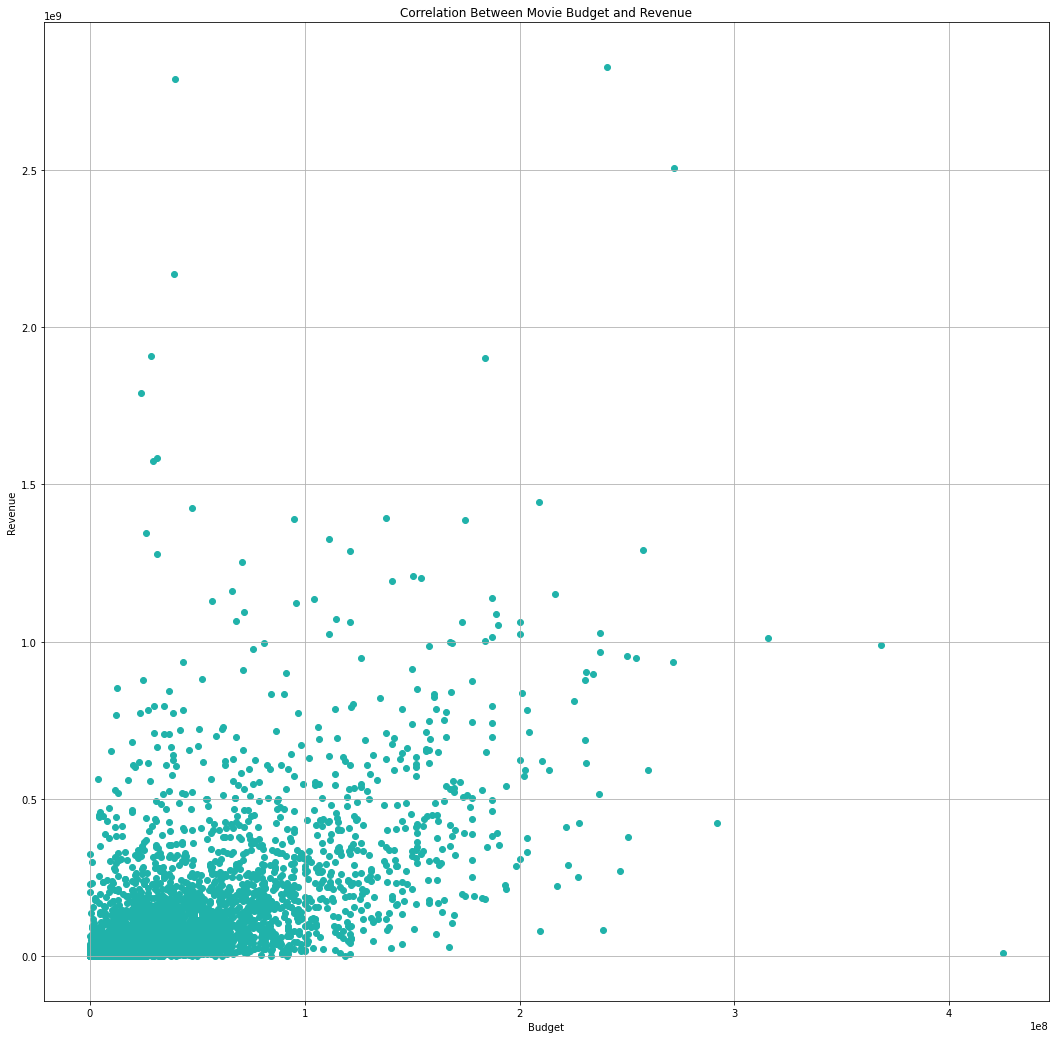

In [22]:
#Make the chart to show the relation between the budget and the revenue of a movie.
plt.figure(figsize=(18,18))
plt.scatter(df['budget_adj'],df['revenue_adj'],color='lightseagreen')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Correlation Between Movie Budget and Revenue')
plt.grid();

The budget seems to have no correlation with the revenue of the movie.

<a id='conclusions'></a>
## Conclusions

> The quality of movies are slowly decreasing over time. Movies with a higher rating is possible to generate higher revenue. Although higher budget is possible to generate higher revenue, the quality of a movie should be the key factor in deciding whether a movie could generate more revenue.  
The data set is not sufficient to make a conclusion. The original data set contains more than 10,000 movies. However, after data cleaning more than half of the data were deleted. This may lead to a biased conclusion.  
More factors, such as director and cast, could influence the revenue of a movie. Although these elements are difficult to be quantified, it is still critical to take these elements into consideration.  